# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [6]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | westport
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | pidhaytsi
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | haukipudas
Processing Record 8 of Set 1 | vila velha
City not found. Skipping...
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | adrar
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | walvis bay
Processing Record 16 of Set 1 | sovetskaya gavan
Processing Record 17 of Set 1 | trincomalee
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | rawson
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | iaciara
Processing Record 22 of Set 1 | port alfred

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from retreived weather data
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1591220750,91,-33.65,115.33,6.67,2.75
1,Bluff,100,NZ,1591220750,78,-46.60,168.33,8.64,9.53
2,Westport,1,US,1591220651,73,41.14,-73.36,25.00,5.70
3,Upernavik,0,GL,1591220750,92,72.79,-56.15,-0.55,2.93
4,Pidhaytsi,66,UA,1591220751,94,49.27,25.13,6.80,2.57


In [8]:
#Export the city data into a .csv.

# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)
weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Save csv file
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,549.000000,5.490000e+02,549.000000,549.000000,549.000000,549.000000,549.000000
mean,50.018215,1.591221e+09,69.420765,20.959490,19.134117,18.942368,3.545920
std,38.154790,7.814517e+01,21.107986,33.091169,90.087464,8.718028,2.268144
min,0.000000,1.591220e+09,10.000000,-54.800000,-179.170000,-2.000000,0.260000
25%,7.000000,1.591221e+09,60.000000,-7.300000,-59.340000,12.000000,1.820000
50%,50.000000,1.591221e+09,74.000000,26.150000,24.620000,20.000000,3.090000
75%,90.000000,1.591221e+09,85.000000,48.530000,97.200000,26.000000,4.780000
max,100.000000,1.591221e+09,100.000000,78.220000,179.320000,42.780000,12.030000


In [10]:
#  Get the indices of cities that have humidity over 100%.
#  Get the indices of cities that have humidity over 100%.
humid_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
humid_city_data

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_city_data, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1591220750,91,-33.65,115.33,6.67,2.75
1,Bluff,100,NZ,1591220750,78,-46.60,168.33,8.64,9.53
2,Westport,1,US,1591220651,73,41.14,-73.36,25.00,5.70
3,Upernavik,0,GL,1591220750,92,72.79,-56.15,-0.55,2.93
4,Pidhaytsi,66,UA,1591220751,94,49.27,25.13,6.80,2.57


In [31]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

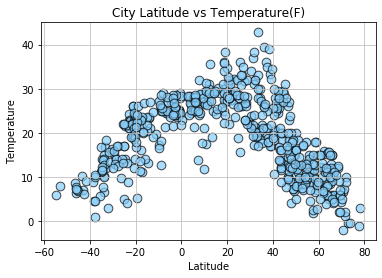

In [33]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the plot
plt.savefig('lat_v_temp.png')
plt.show()


## Latitude vs. Humidity Plot

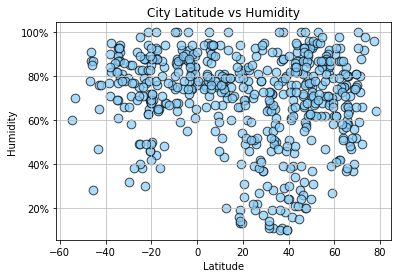

In [35]:

#build a scatter plot based on the columns Latitude and humidity
plt.figure(figsize = (6,4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

#save the plot
plt.savefig('lat_v_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

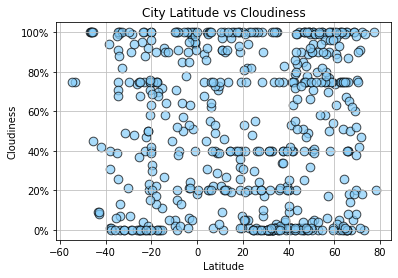

In [37]:

#build a scatter plot based on the columns Latitude and cloudiness
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

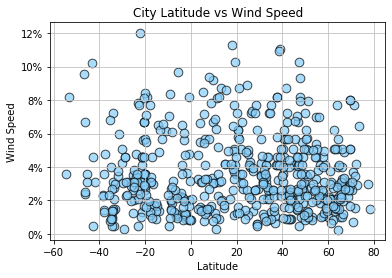

In [38]:
#build a scatter plot based on the columns Latitude and wind speed
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_wind.png')
plt.show()

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5982047410114815


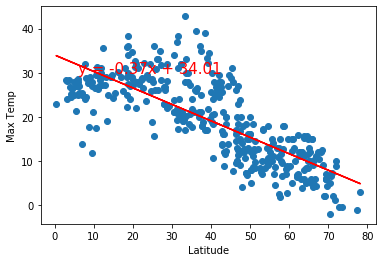

In [45]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6510054758392568


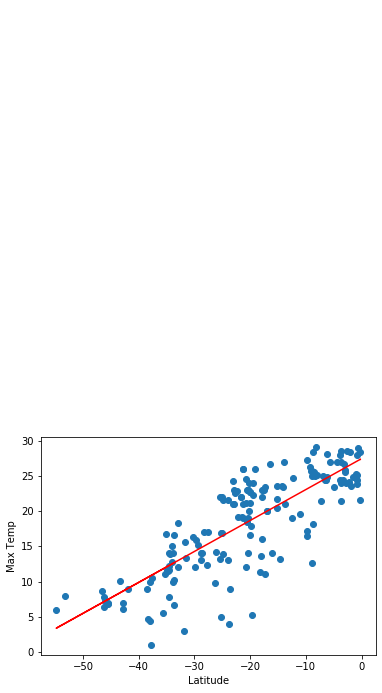

In [48]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

A high r values show a strong positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000559636751314017


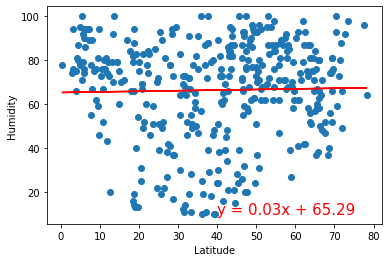

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012943822404416293


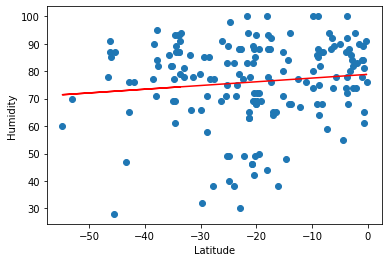

In [49]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0038151314980208666


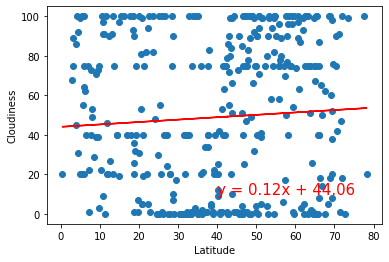

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005880810870396848


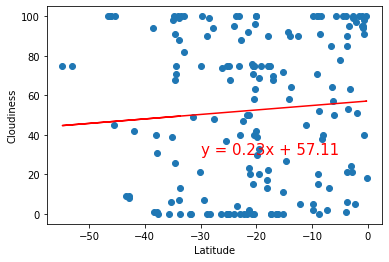

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values show a very small positive relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019362868428280517


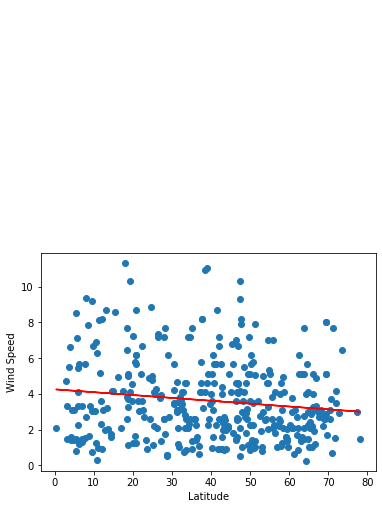

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0111265371953407


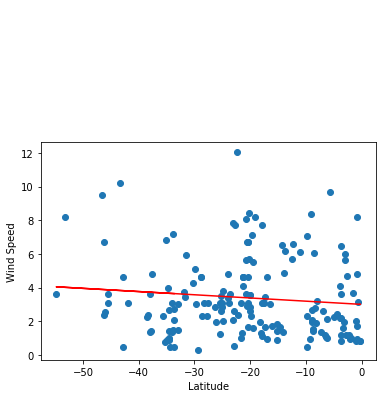

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

Low r values show that there isn't a good relationship between wind speed and latitude. The difference isn't significant enough. 